In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob
from specim_test.specim.specfuncs import spec2d
from specim.specfuncs import spec1d
from astropy.io import fits as pf

In [2]:
file_loc = '../galaxy_spectra/LRIS_red_data_201213/keck_lris_red_A/Science/*'

In [3]:
file_list = []
out_file = []
for i,p in enumerate(glob.glob(file_loc)):
    if 'spec2d' in p and '0053m1' in p:
        file_list.append(p)
        frame = p.split('_')[-3][:5]
        out_file.append('0053m1_r'+ frame + '_spec1d.fits')

In [4]:
spec = spec2d.Spec2d(file_list[3], hext=12, xtrim=[365, 400], transpose=True)
#spec.set_dispaxis('y')
spec.subtract_sky_2d()     #outfile=out_file[i])
spec.szap_new(infile='0053m1_lens_median_image_new.fits')  #, outfile='test.fits')


Loading file ../galaxy_spectra/LRIS_red_data_201213/keck_lris_red_A/Science/spec2d_r201213_0027-0053m1_LRISr_2020Dec13T062831.930.fits
-----------------------------------------------
Read in 2-dimensional spectrum from ../galaxy_spectra/LRIS_red_data_201213/keck_lris_red_A/Science/spec2d_r201213_0027-0053m1_LRISr_2020Dec13T062831.930.fits (HDU=12)
The input dataset was trimmed
 xrange: 365:401.  yrange: 0:4096
The input dataset was transposed
Final data dimensions (x y): 4096 x 36

Dispersion axis:              x
N_pixels along dispersion axis: 4096


sky model will be generated from data

 Spectrum Start:     0.00
 Spectrum End:     4095.00
 Dispersion (1st pixel):   1.00
 Dispersion (average):      1.00


From this point sky subtracted data will be used

From now cosmic ray rejected data will be used



<IPython.core.display.Javascript object>


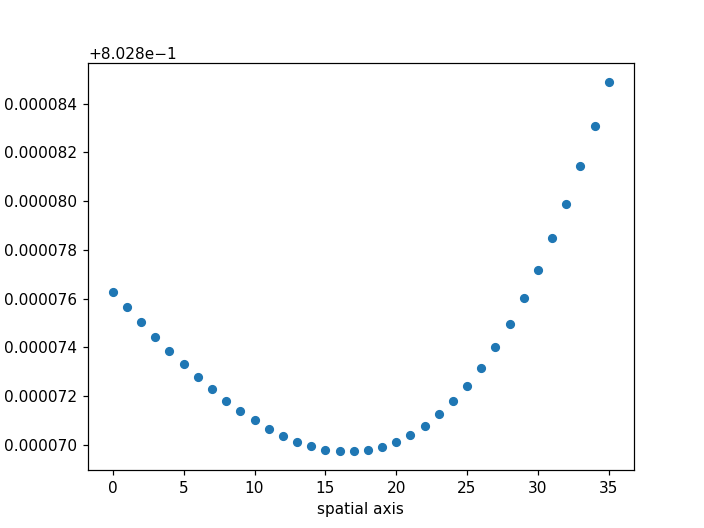

<IPython.core.display.Javascript object>


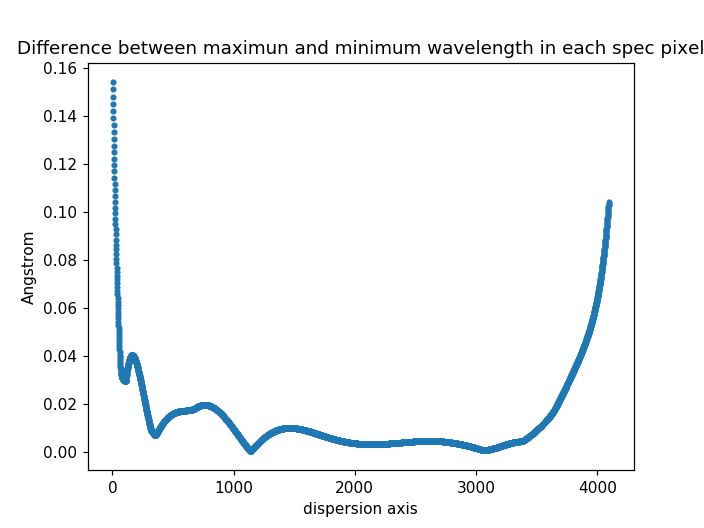

Dispersion : 0.800000
Found 46 NaNs in the two-dimensional spectrum

sky subtracted and cosmic ray rejected data has been resampled in place of the coordinateds whcih rectify the tilted wave image


In [5]:
%matplotlib notebook
spec.do_waverect(doplot=True)

Profile max value (before normalization) 103.206482


<IPython.core.display.Javascript object>


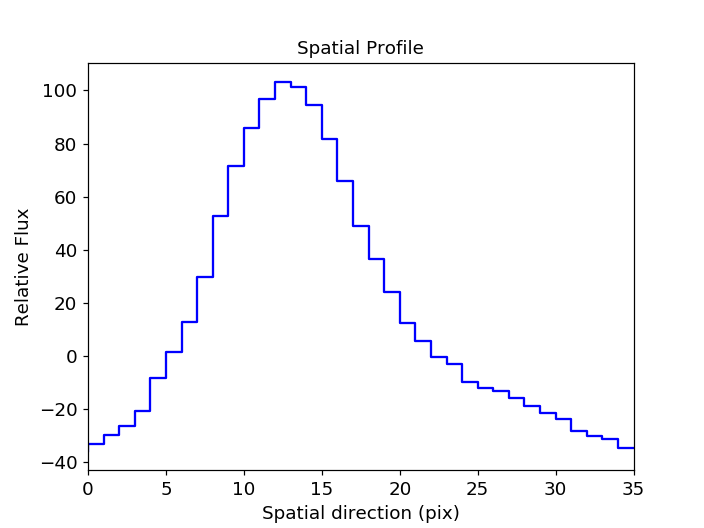

In [6]:
profile = spec.spatial_profile(pixrange=[1800, 2000])


To create an initial model you first need to enter degree of background polynomial(<3) and number of Gaussian and Moffat profile as integers.
Order of background polynomial : 0
Number of Gaussian profile : 1
Number of Moffat profile : 0

Now enter constants of the background polynomial upto degree 0
c0 : -25

Enter parameter values for a Gaussian profile in following format...
amplitude_value, mu_value, sigma_value

Parameters of Gaussian profile 1 : 125, 13, 3

amplitude=125.000000, mu=13.000000, sigma=3.000000

Fitted model
-------------
Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1]
Components: 
    [0]: <Polynomial1D(0, c0=-25.56548953)>

    [1]: <Gaussian1D(amplitude=127.07415489, mean=13.70723897, stddev=4.55970113)>
Parameters:
            c0_0           amplitude_1           mean_1            stddev_1    
    ------------------- ------------------ ------------------ -----------------
    -25.565489526869495 127.07415489396331 13.70

<IPython.core.display.Javascript object>


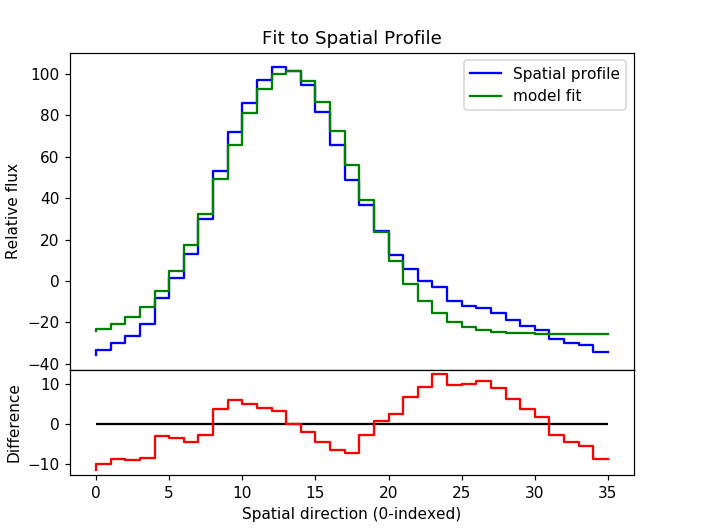

<IPython.core.display.Javascript object>


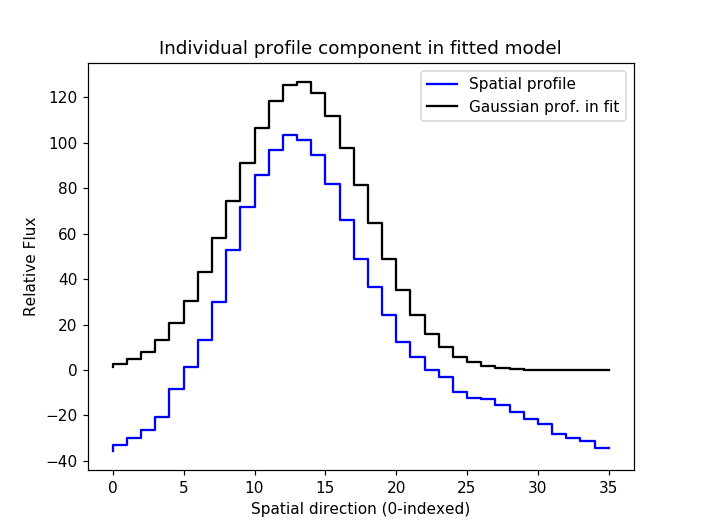


Do you want to start over ? : type yes/no
no


In [7]:
mod = spec.initial_model()


Running fit_trace
---------------------------------------------------------
Fitting to the trace at 163 segments
  of the 2D spectrum with stepsize=25 pix ...
    Done
Fitting polynomial of degree 3 to parameter: c0_0
Fitting polynomial of degree 3 to parameter: mean_1
Fitting polynomial of degree 4 to parameter: stddev_1


<IPython.core.display.Javascript object>


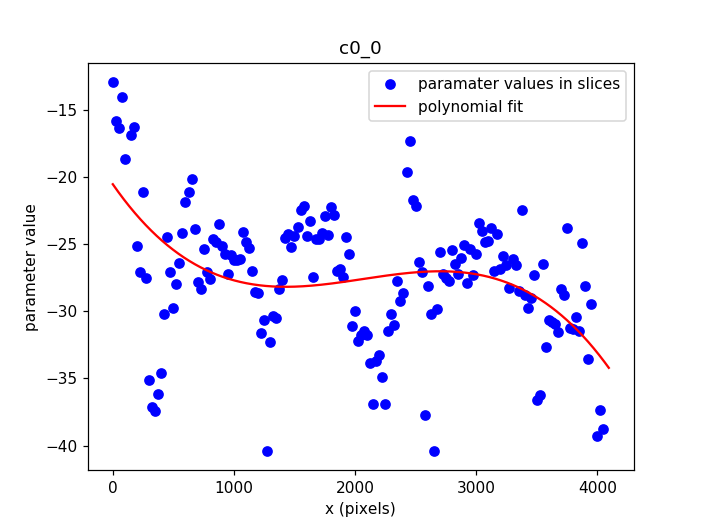

<IPython.core.display.Javascript object>


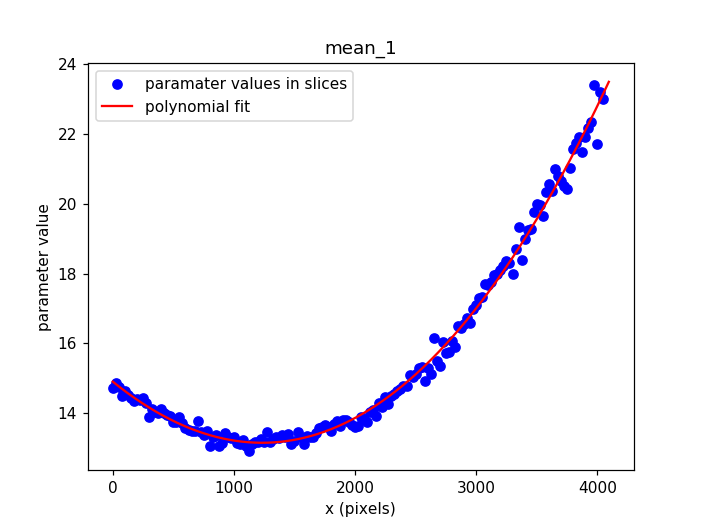

<IPython.core.display.Javascript object>


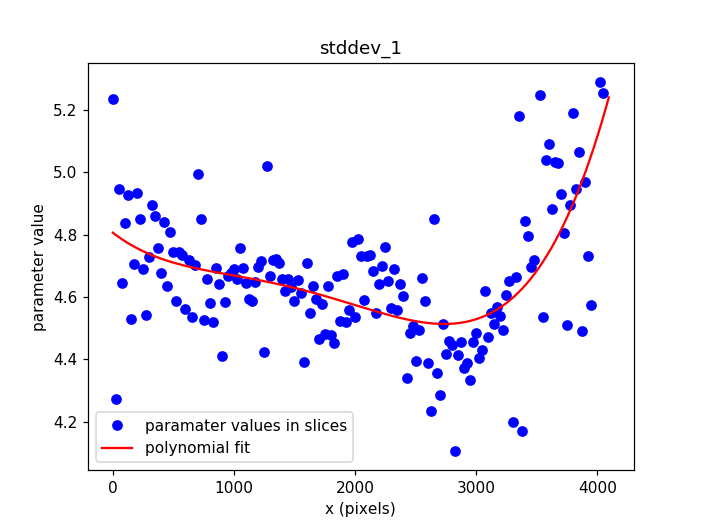

In [8]:
spec.find_and_trace(mod, stepsize=25)

 Spectrum Start:  5788.93
 Spectrum End:     9064.92
 Dispersion (1st pixel):   0.80
 Dispersion (average):      0.80


Plotting the spectrum


<IPython.core.display.Javascript object>


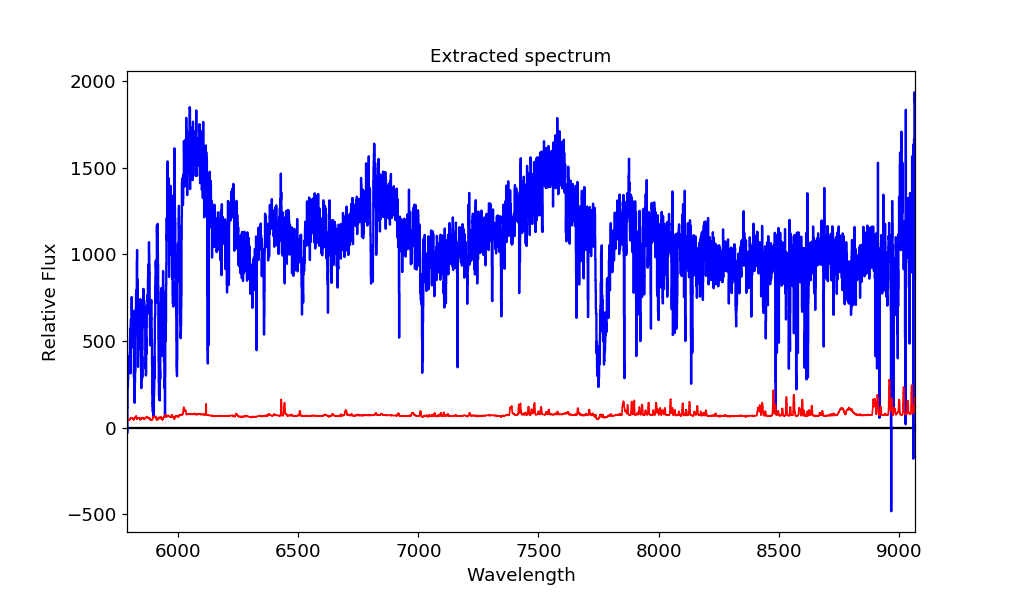

Saved spectrum to file 0053m1_r0027-_spec1d.fits in format fits


In [10]:
spec.extract(outfile=out_file[3], outformat='fits')

In [11]:
inf = '0053m1_r0027-_spec1d.fits'
spec1 = spec1d.Spec1d(inf, informat='fits')


Reading spectrum from 0053m1_r0027-_spec1d.fits
Expected file format: fits
 Spectrum Start:  5788.93
 Spectrum End:     9064.92
 Dispersion (1st pixel):   0.80
 Dispersion (average):      0.80



<IPython.core.display.Javascript object>


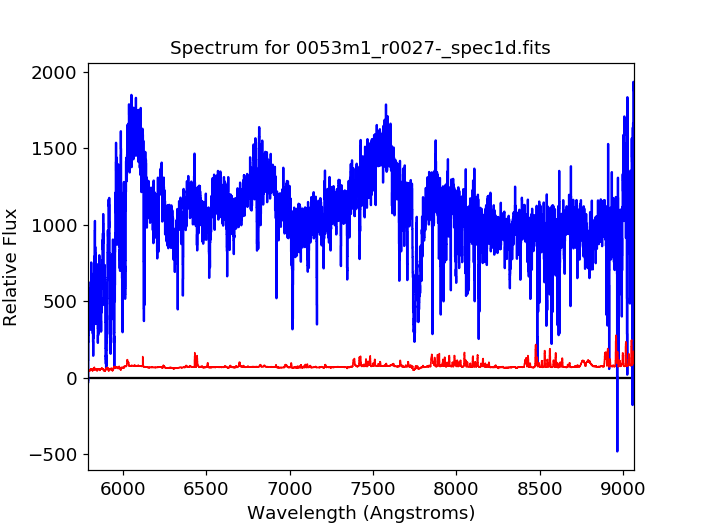

<IPython.core.display.Javascript object>


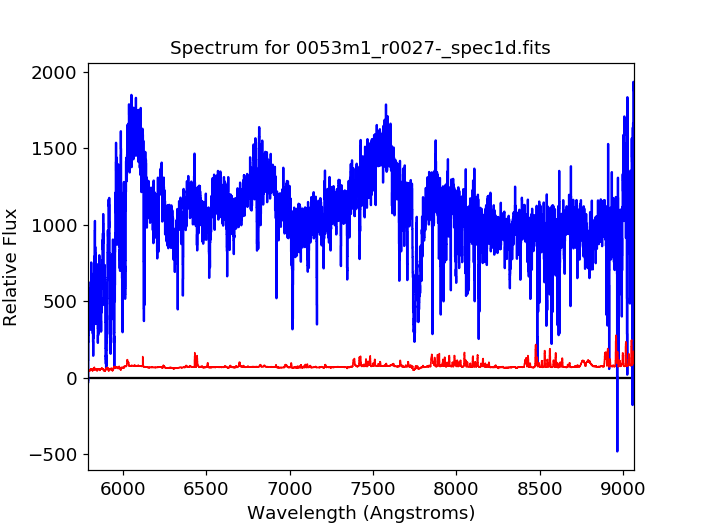

In [12]:
spec1.plot()

<IPython.core.display.Javascript object>


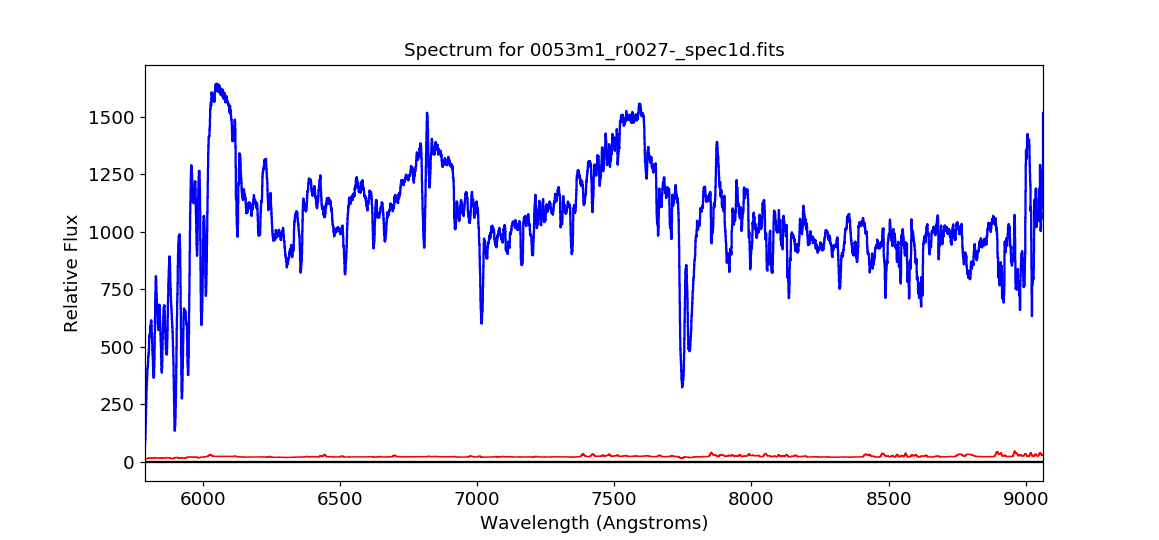

In [15]:
spec1.smooth(11)